# Modeling

In [126]:
import pandas as pd
import numpy as np

df = pd.read_csv('feature_df.csv', parse_dates=True)
df.set_index(pd.DatetimeIndex(df['Date']))
df.head()

,Date,amount_dispensed,t_minus_1,t_minus_2,t_minus_3,t_minus_7,weekday,month,pm25,pm10
0,2020-07-13,240.0,0.0,500.0,240.0,240.0,0,7,NaN,10.0
1,2020-07-14,240.0,240.0,0.0,500.0,220.0,1,7,18.0,20.0
2,2020-07-15,0.0,240.0,240.0,0.0,380.0,2,7,22.0,24.0
3,2020-07-16,0.0,0.0,240.0,240.0,700.0,3,7,21.0,26.0
4,2020-07-17,620.0,0.0,0.0,240.0,240.0,4,7,21.0,17.0


# Remember that the underlying data is very noisy

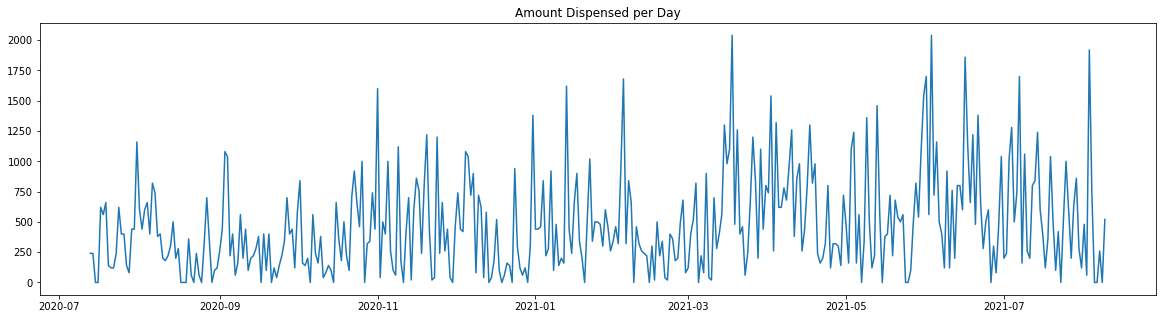

In [125]:
plt.figure(figsize=(20, 5))
plt.plot(model_df['amount_dispensed'])
plt.title('Amount Dispensed per Day')
plt.show()

#### There looks like a lot of noise in this model

<AxesSubplot:>

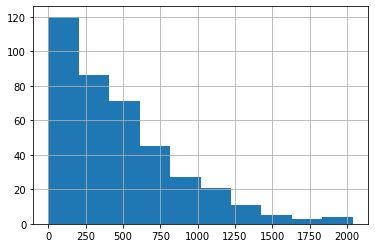

In [127]:
model_df['amount_dispensed'].hist() # seems like the values are drawn from an an exponential probability density function

# Predicting how much cash will be dispensed on a given day based on the Air Quality and the amount dispensed in the recent past.

This is are hard task since there a wide range of values 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# maybe you should normalize everything and then de normalize it at the end. 


simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
target = 'amount_dispensed'
features = [a for a in model_df.columns if a != target]

X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


simple_imputer.fit(X_train)
X_train = pd.DataFrame(data=simple_imputer.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(data=simple_imputer.transform(X_test), columns = X.columns)


,t_minus_1,t_minus_2,t_minus_3,t_minus_7,weekday,month
0,500.0,1160.0,720.0,1540.0,0.0,6.0
1,140.0,480.0,100.0,840.0,0.0,1.0
2,1380.0,300.0,0.0,300.0,4.0,1.0
3,200.0,100.0,440.0,60.0,0.0,9.0
4,660.0,1140.0,1860.0,200.0,5.0,6.0
...,...,...,...,...,...,...
309,0.0,400.0,100.0,280.0,1.0,9.0
310,1000.0,460.0,660.0,220.0,1.0,10.0
311,680.0,780.0,620.0,1540.0,4.0,4.0
312,600.0,500.0,280.0,1220.0,5.0,6.0


In [52]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# you only have 6 features 
RandomForestRegressor?


Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the fore

# Testing parameters


In [63]:
def get_train_test_split(model_df):
    simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    target = 'amount_dispensed'
    features = [a for a in model_df.columns if a != target]

    X = model_df[features]
    y = model_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

    simple_imputer.fit(X_train)
    X_train = pd.DataFrame(data=simple_imputer.transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(data=simple_imputer.transform(X_test), columns = X.columns)

    return X_train, X_test, y_train, y_test 


In [96]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
random_forest_outcomes = pd.DataFrame(columns=['max_depth', 'n_estimators', 'max_features', 'mean_absolute_error'])

predicted_true_points = []

for max_depth in [None, 2,3]:
    for n_estimators in [100,200,500]:
        for max_features in [2,4,6]:
            X_train, X_test, y_train, y_test = get_train_test_split(model_df) # get different train test splits with a different imputer at each call.

            rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth= max_depth, max_features=max_features, random_state=42)
            rf_model.fit(X_train,y_train)
            y_pred = rf_model.predict(X_test)

            points = (y_pred, y_test)
            predicted_true_points.append(points)

            mse = round(mean_absolute_error(y_test,y_pred),2)

            row = [max_depth,n_estimators,max_features,mse]
            random_forest_outcomes.loc[len(random_forest_outcomes)] = row
            print(row)


[None, 100, 2, 311.24]
[None, 100, 4, 327.3]
[None, 100, 6, 309.58]
[None, 200, 2, 312.62]
[None, 200, 4, 320.16]
[None, 200, 6, 305.87]
[None, 500, 2, 293.72]
[None, 500, 4, 353.24]
[None, 500, 6, 355.94]
[2, 100, 2, 304.07]
[2, 100, 4, 287.74]
[2, 100, 6, 267.95]
[2, 200, 2, 289.97]
[2, 200, 4, 329.8]
[2, 200, 6, 344.93]
[2, 500, 2, 294.66]
[2, 500, 4, 286.2]
[2, 500, 6, 299.17]
[3, 100, 2, 325.22]
[3, 100, 4, 261.49]
[3, 100, 6, 305.94]
[3, 200, 2, 308.95]
[3, 200, 4, 315.94]
[3, 200, 6, 316.58]
[3, 500, 2, 305.66]
[3, 500, 4, 311.5]
[3, 500, 6, 263.74]


<AxesSubplot:>

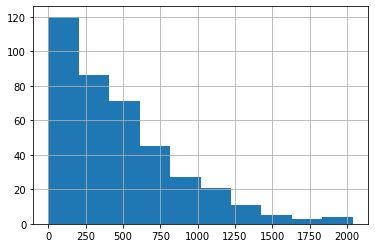

In [103]:
model_df['amount_dispensed'].hist()

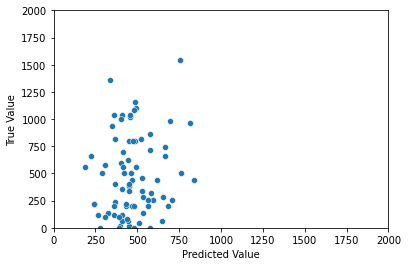

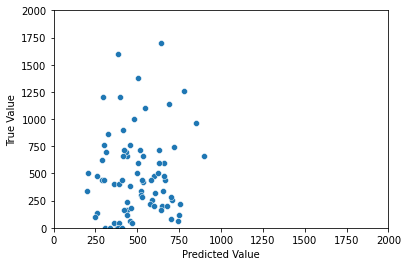

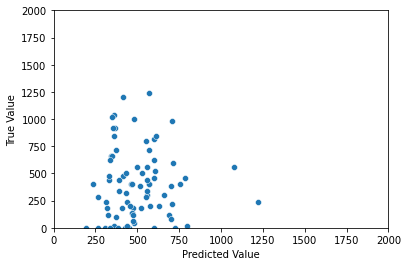

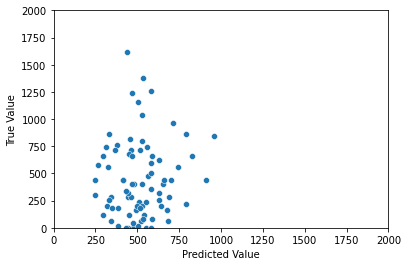

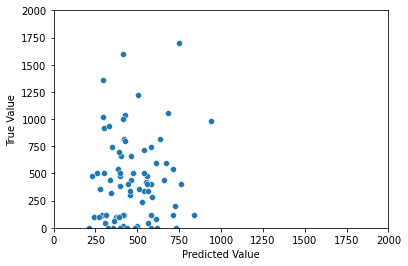

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
for y_pred, y_test in predicted_true_points[:5]:
    sns.scatterplot(x=y_pred, y=y_test, )
    plt.ylim(0,2000)
    plt.xlim(0,2000)
    plt.ylabel('True Value')
    plt.xlabel('Predicted Value')
    plt.show()
    

# My Model does not predict values at the appropriate range. Most of the values are clustered around $500 while the real values have a wider spread

/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


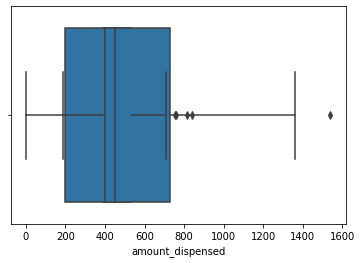

/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


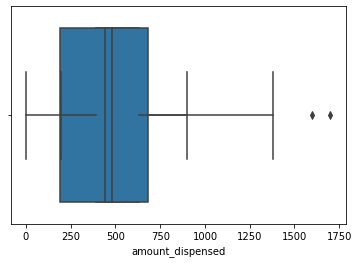

/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


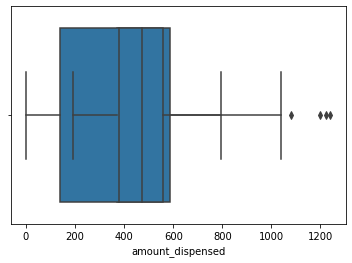

/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


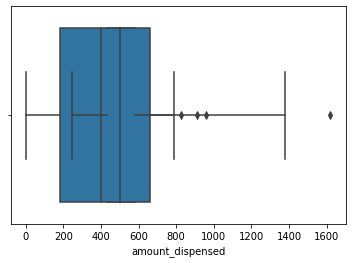

/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/parkerburchett/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


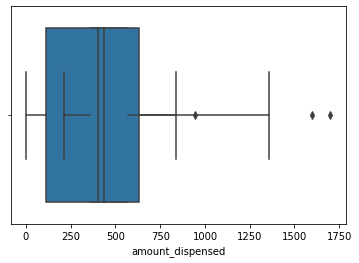

In [138]:
for y_pred, y_test in predicted_true_points[:5]:
    chart_df = pd.DataFrame()
    sns.boxplot(y_pred)
    sns.boxplot(y_test)
    plt.show()

